# Airbnb Vienna Exploratory Analysis

### Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme()
pd.options.display.max_columns = 0

### Data loading and preview

In [2]:
df = pd.read_csv('http://data.insideairbnb.com/austria/vienna/vienna/2023-12-15/data/listings.csv.gz', index_col='id')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14697 entries, 38768 to 1046241477177647354
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   14697 non-null  object 
 1   scrape_id                                     14697 non-null  int64  
 2   last_scraped                                  14697 non-null  object 
 3   source                                        14697 non-null  object 
 4   name                                          14697 non-null  object 
 5   description                                   0 non-null      float64
 6   neighborhood_overview                         7553 non-null   object 
 7   picture_url                                   14697 non-null  object 
 8   host_id                                       14697 non-null  int64  
 9   host_url                                      14

In [4]:
df.head()

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
38768,https://www.airbnb.com/rooms/38768,20231215032838,2023-12-15,city scrape,Rental unit in Vienna · ★4.75 · 1 bedroom · 3 ...,NaN,the Karmeliterviertel became very popular in t...,https://a0.muscache.com/pictures/ad4089a3-5355...,166283,https://www.airbnb.com/users/show/166283,Hannes,2010-07-14,"Vienna, Austria",I am open minded and like travelling myself. I...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/166283/profil...,https://a0.muscache.com/im/users/166283/profil...,Leopoldstadt,3.0,3.0,"['email', 'phone']",t,t,"Vienna, Austria",Leopoldstadt,NaN,48.21924,16.37831,Entire rental unit,Entire home/apt,5,NaN,1 bath,NaN,3.0,[],$77.00,4,75,3,28,1125,1125,9.1,1125.0,NaN,t,12,42,72,159,2023-12-15,384,27,4,2011-03-23,2023-12-14,4.75,4.81,4.65,4.91,4.94,4.77,4.70,NaN,t,3,3,0,0,2.48
40625,https://www.airbnb.com/rooms/40625,20231215032838,2023-12-15,city scrape,Rental unit in Vienna · ★4.85 · 2 bedrooms · 4...,NaN,The neighbourhood offers plenty of restaurants...,https://a0.muscache.com/pictures/11509144/d55c...,175131,https://www.airbnb.com/users/show/175131,Ingela,2010-07-20,"Vienna, Austria",I´m originally from Sweden but have been livin...,within an hour,98%,85%,t,https://a0.muscache.com/im/users/175131/profil...,https://a0.muscache.com/im/users/175131/profil...,Rudolfsheim-Fünfhaus,17.0,19.0,"['email', 'phone']",t,t,"Vienna, Austria",Rudolfsheim-Fnfhaus,NaN,48.18434,16.32701,Entire rental unit,Entire home/apt,6,NaN,1 bath,NaN,4.0,[],$150.00,1,180,1,3,180,180,1.0,180.0,NaN,t,19,49,79,350,2023-12-15,202,17,1,2010-08-04,2023-11-19,4.85,4.91,4.88,4.89,4.94,4.59,4.72,NaN,t,15,14,1,0,1.24
51287,https://www.airbnb.com/rooms/51287,20231215032838,2023-12-15,city scrape,Rental unit in Vienna · ★4.66 · Studio · 2 bed...,NaN,The neighbourhood has a lot of very nice littl...,https://a0.muscache.com/pictures/25163038/1c4e...,166283,https://www.airbnb.com/users/show/166283,Hannes,2010-07-14,"Vienna, Austria",I am open minded and like travelling myself. I...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/166283/profil...,https://a0.muscache.com/im/users/166283/profil...,Leopoldstadt,3.0,3.0,"['email', 'phone']",t,t,"Vienna, Austria",Leopoldstadt,NaN,48.21778,16.37847,Entire rental unit,Entire home/apt,3,NaN,1 bath,NaN,2.0,[],$73.00,5,90,3,14,1125,1125,8.4,1125.0,NaN,t,12,42,72,72,2023-12-15,370,14,1,2011-01-27,2023-12-09,4.66,4.78,4.52,4.92,4.95,4.86,4.59,NaN,f,3,3,0,0,2.36
70637,https://www.airbnb.com/rooms/70637,20231215032838,2023-12-15,city scrape,Rental unit in Vienna · ★4.77 · 1 bedroom · 2 ...,NaN,NaN,https://a0.muscache.com/pictures/9

### Data types correction

#### Categorical and boolean data

In [ ]:
categories = [
    'source',
    'host_response_time',
    'neighbourhood_cleansed',
    'room_type'
]

df[categories] = df[categories].astype('category')

booleans = [
    'host_is_superhost',
    'host_has_profile_pic',
    'host_identity_verified',
    'has_availability',
    'instant_bookable'
]

df[booleans] = df[booleans].replace({'t': True, 'f': False}).fillna(False)

#### Numerical data

In [6]:
numbers = [
    'host_response_rate',
    'host_acceptance_rate'
]

for x in numbers:
    df[x] = df[x].str.replace('%', '').astype('float') / 100

df['bathrooms'] = np.where(df['bathrooms_text'].str.contains('half', case=False), 0.5, df['bathrooms_text'].str.split().str[0]).astype('float')
df['price'] = df['price'].str.replace('[$,]', '', regex=True).astype('float')

#### Datetime data

In [7]:
dates = [
    'last_scraped',
    'host_since',
    'calendar_last_scraped',
    'first_review',
    'last_review'
]

for x in dates:
    df[x] = pd.to_datetime(df[x])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14697 entries, 38768 to 1046241477177647354
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   14697 non-null  object        
 1   scrape_id                                     14697 non-null  int64         
 2   last_scraped                                  14697 non-null  datetime64[ns]
 3   source                                        14697 non-null  category      
 4   name                                          14697 non-null  object        
 5   description                                   0 non-null      float64       
 6   neighborhood_overview                         7553 non-null   object        
 7   picture_url                                   14697 non-null  object        
 8   host_id                                       14697 n

### Data summary

#### Numerical data

In [9]:
numerical_data = [
    'host_response_rate',
    'host_acceptance_rate',
    'host_listings_count',
    'accommodates',
    'bathrooms',
    'beds',
    'price',
    'minimum_nights',
    'maximum_nights',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'number_of_reviews',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'reviews_per_month'
]

In [10]:
summary_numerical = df[numerical_data].describe().round(2).T
summary_numerical['missing'] = df.count().max() - summary_numerical['count']
summary_numerical

,count,mean,std,min,25%,50%,75%,max,missing
host_response_rate,10819.0,0.95,0.15,0.00,0.99,1.00,1.00,1.00,3878.0
host_acceptance_rate,11339.0,0.90,0.22,0.00,0.94,0.99,1.00,1.00,3358.0
host_listings_count,14695.0,29.98,89.75,1.00,1.00,3.00,17.00,2461.00,2.0
accommodates,14697.0,3.45,1.89,1.00,2.00,3.00,4.00,16.00,0.0
bathrooms,14697.0,1.19,0.46,0.00,1.00,1.00,1.50,15.00,0.0
beds,14441.0,1.93,1.28,1.00,1.00,2.00,2.00,28.00,256.0
price,11828.0,135.79,306.20,10.00,70.00,96.00,138.00,18457.00,2869.0
minimum_nights,14697.0,6.23,25.96,1.00,1.00,2.00,3.00,1125.00,0.0
maximum_nights,14697.0,495.15,932.87,1.00,90.00,365.00,1125.00,99999.00,0.0
availability_30,14697.0,8.73,9.11,0.00,0.00,7.00,16.00,30.00,0.0


#### Categorical data

In [11]:
categorical_data = [
    'host_response_time',
    'host_is_superhost',
    'host_has_profile_pic',
    'host_identity_verified',
    'neighbourhood_cleansed',
    'room_type',
    'has_availability',
    'instant_bookable'
]

In [12]:
summary_categorical = df[categorical_data].describe().round(2).T
summary_categorical['missing'] = df.count().max() - summary_categorical['count']
summary_categorical

,count,unique,top,freq,missing
host_response_time,10819,4,within an hour,8552,3878
host_is_superhost,14697,2,False,10900,0
host_has_profile_pic,14697,2,True,14221,0
host_identity_verified,14697,2,True,13178,0
neighbourhood_cleansed,14697,23,Leopoldstadt,1693,0
room_type,14697,4,Entire home/apt,11838,0
has_availability,14697,2,True,11769,0
instant_bookable,14697,2,False,7667,0


### Data cleaning

#### Missing data and URLs

In [13]:
has_missing_data = df.isna().sum() > 0
df.loc[:, has_missing_data].isna().sum().sort_values() / len(df) * 100

host_total_listings_count         0.013608
host_name                         0.013608
host_since                        0.013608
host_thumbnail_url                0.013608
host_picture_url                  0.013608
host_verifications                0.013608
host_listings_count               0.013608
bathrooms_text                    0.027216
beds                              1.741852
review_scores_rating             17.207593
review_scores_communication      17.207593
review_scores_accuracy           17.214397
review_scores_location           17.214397
review_scores_checkin            17.214397
review_scores_cleanliness        17.214397
review_scores_value              17.228006
first_review                     17.370892
last_review                      17.370892
reviews_per_month                17.370892
price                            19.520991
host_acceptance_rate             22.848200
host_location                    24.862217
host_response_rate               26.386337
host_respon

In [14]:
is_url = df.columns.str.contains('url')
df.loc[:, is_url].columns

Index(['listing_url', 'picture_url', 'host_url', 'host_thumbnail_url',
       'host_picture_url'],
      dtype='object')

In [15]:
df.drop([
    'neighbourhood_group_cleansed',
    'calendar_updated',
    'license',
    'bedrooms',
    'description',
    'host_neighbourhood',
    'host_about',
    'neighborhood_overview',
    'neighbourhood',
    'listing_url',
    'picture_url',
    'host_url',
    'host_thumbnail_url',
    'host_picture_url',
], axis=1, inplace=True)

df.dropna(subset=['price'], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11828 entries, 38768 to 1046241477177647354
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   scrape_id                                     11828 non-null  int64         
 1   last_scraped                                  11828 non-null  datetime64[ns]
 2   source                                        11828 non-null  category      
 3   name                                          11828 non-null  object        
 4   host_id                                       11828 non-null  int64         
 5   host_name                                     11827 non-null  object        
 6   host_since                                    11827 non-null  datetime64[ns]
 7   host_location                                 8679 non-null   object        
 8   host_response_time                            10496 n

#### Outliers and imputation

In [17]:
np.percentile(df['price'].dropna(), 95)

289.0

In [18]:
outliers_price = (df['price'] > 289)
df = df[~outliers_price]

### Data visualisation

<Axes: xlabel='price', ylabel='Count'>

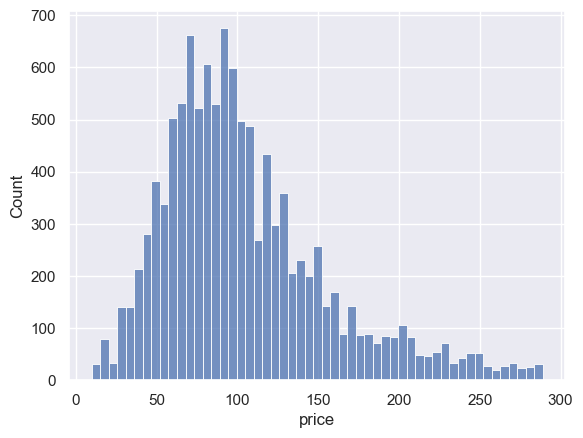

In [19]:
sns.histplot(df['price'])